In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.activations import relu,sigmoid,linear
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [3]:
data = pd.read_csv("/content/drive/MyDrive/file/data.csv")
data

,Image,label
0,BikesHelmets0,1
1,BikesHelmets1,1
2,BikesHelmets2,1
3,BikesHelmets3,1
4,BikesHelmets4,1
...,...,...
745,BikesHelmets746,1
746,BikesHelmets747,1
747,BikesHelmets748,1
748,BikesHelmets749,1


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
len(data['label'])

750

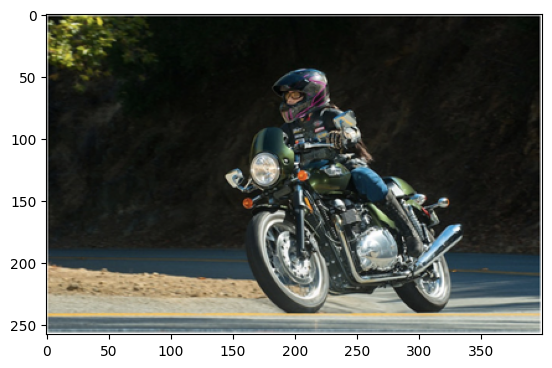

(258, 400, 4)


In [6]:
img = mpimg.imread('/content/drive/MyDrive/file/'+data['Image'][4]+'.png')
imgplot = plt.imshow(img)
plt.show()
print(img.shape)

In [7]:
type(data['Image'])

pandas.core.series.Series

In [8]:
x = []

for i in data['Image']:
  #img = cv2.imread('/content/drive/MyDrive/file/'+i+'.png')
  #img = cv2.resize(img,(64,64))
  img = Image.open('/content/drive/MyDrive/file/'+i+'.png')
  img = img.resize((64,64))
  img = img.convert('RGB')
  img = np.array(img)
  x.append(img)

In [9]:
print(x[0].shape)

(64, 64, 3)


In [10]:
x = np.array(x)
y = np.array(data['label'])

In [11]:
x_scaled = x/255
x_scaled.shape

(750, 64, 64, 3)

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20)

In [13]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 256)               3

In [15]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['acc']
)

In [41]:
history = model.fit(x_train,y_train,validation_split = 0.1,epochs = 10)

Epoch 1/10
17/17 [==============================] - 4s 236ms/step - loss: 0.6038 - acc: 0.7056 - val_loss: 0.6547 - val_acc: 0.6333
Epoch 2/10
17/17 [==============================] - 5s 287ms/step - loss: 0.5592 - acc: 0.7130 - val_loss: 0.6928 - val_acc: 0.6500
Epoch 3/10
17/17 [==============================] - 5s 272ms/step - loss: 0.5204 - acc: 0.7463 - val_loss: 0.6795 - val_acc: 0.6333
Epoch 4/10
17/17 [==============================] - 3s 206ms/step - loss: 0.4297 - acc: 0.7981 - val_loss: 0.7434 - val_acc: 0.5667
Epoch 5/10
17/17 [==============================] - 3s 206ms/step - loss: 0.3299 - acc: 0.8685 - val_loss: 0.8317 - val_acc: 0.6000
Epoch 6/10
17/17 [==============================] - 6s 347ms/step - loss: 0.2553 - acc: 0.9074 - val_loss: 1.0451 - val_acc: 0.5333
Epoch 7/10
17/17 [==============================] - 4s 210ms/step - loss: 0.1777 - acc: 0.9370 - val_loss: 0.9206 - val_acc: 0.6167
Epoch 8/10
17/17 [==============================] - 3s 206ms/step - loss: 0.

In [43]:
loss,accuracy = model.evaluate(x_test,y_test)
print("Test Accuracy: {}".format(accuracy))

5/5 [==============================] - 1s 96ms/step - loss: 1.2207 - acc: 0.6933
Test Accuracy: 0.6933333277702332


[]

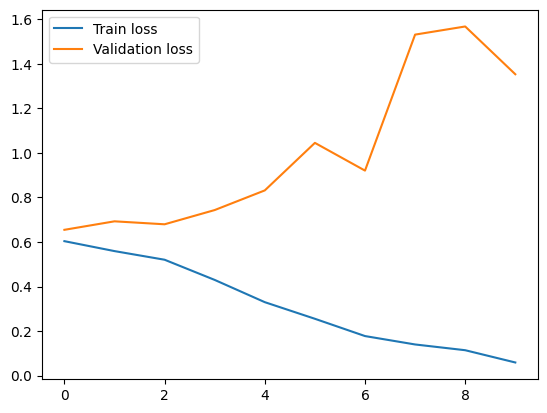

In [44]:
h = history
plt.plot(h.history['loss'],label = 'Train loss')
plt.plot(h.history['val_loss'],label = 'Validation loss')
plt.legend()
plt.plot()


[]

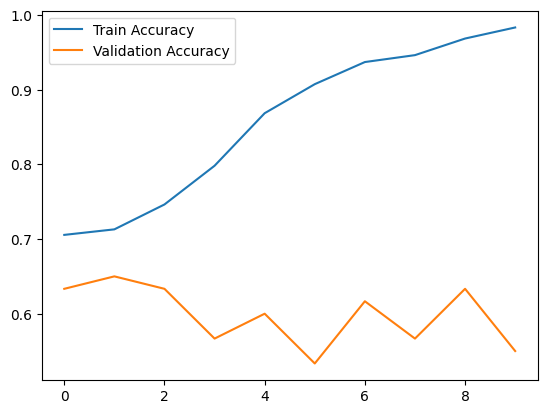

In [45]:
plt.plot(h.history['acc'],label = 'Train Accuracy')
plt.plot(h.history['val_acc'],label = 'Validation Accuracy')
plt.legend()
plt.plot()

Enter the image path : /content/drive/MyDrive/file/BikesHelmets747.png


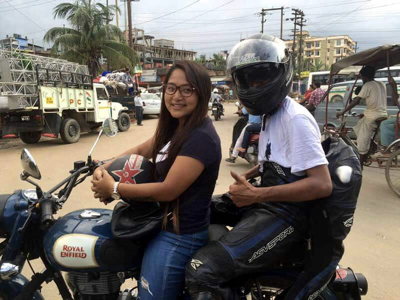

In [39]:
img_path = input("Enter the image path : ")
inp_img = cv2.imread(img_path)
cv2_imshow(inp_img)

In [40]:
img = Image.open(img_path)
img = img.resize((64,64))
img = img.convert('RGB')
img = np.array(img)

#inp_img = cv2.resize(inp_img,(64,64))
inp_img = img / 255
print(inp_img.shape)
inp_img = np.reshape(inp_img,[1,64,64,3])
inp_prediction = model.predict(inp_img)
print(inp_prediction)

inp_pred_label = np.argmax(inp_prediction)
print(inp_pred_label)

if inp_pred_label == 1:
  print("The person in the image is wearing a helmet.")
else:
  print("The person in the image is not wearing a helmet.")

(64, 64, 3)
1/1 [==============================] - 0s 34ms/step
[[0.4655945  0.54432243]]
1
The person in the image is wearing a helmet.
